In [1]:
from csoundengine.offline import OfflineEngine
import random

--Csound version 7.0 (double samples) Oct 28 2025
[commit: 15afda0ba81a895a4e87ac3ef5fe476702b072bf]
using libsndfile-1.2.2
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-ltvdqgr5.wav (WAV)
SECTION 1:
resetting Csound instance
		   overall amps:  0.22243  0.00000
	   overall samples out of range:        0        0
0 errors in performance
512 1024 sample blks of shorts written to /tmp/csoundengine-ltvdqgr5.wav (WAV)


RenderJob(outfile='/tmp/csoundengine-ltvdqgr5.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
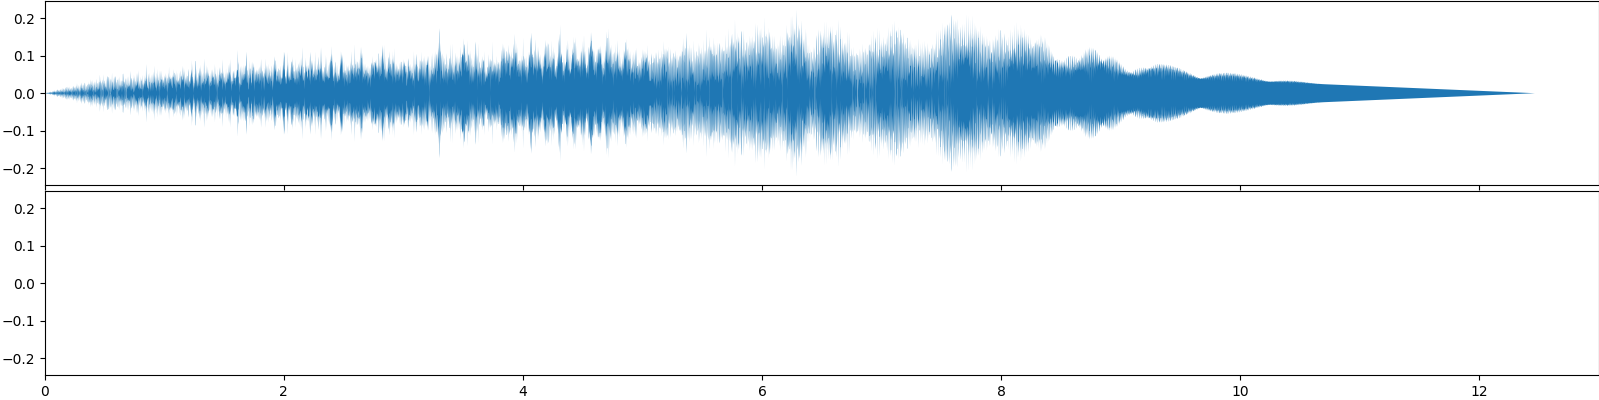

In [6]:
from csoundengine.offline import OfflineEngine
import random

engine = OfflineEngine()

engine.compile(r'''
instr vco
    pset 0, 0, 0, 263, 0.1, 1, 1000, 0.1, 0.5
    ifreq = p4
    iamp = p5
    ktransp = p6
    kcutoff = p7
    ifade = p8
    ifilterq = p9
    kfreq = ifreq * ktransp
    aout = vco2:a(iamp, kfreq)
    iresonance = 0.6
    idistortion = 0.
    aout = lpf18(aout, kcutoff, iresonance, idistortion)
    aout *= linsegr:a(0, ifade, 1, ifade, 0)
    outch 1, aout
endin
''')

f0 = 130
for factor in [1, 2.76, 5.3, 5.4, 8.93]:
  
    freq = f0 * factor
    # with unique=True a fractional p1 is generated, this makes it
    # possible to automate the event later
    # NB: csoundengine parses instr code and is aware of names given to pfields
    event = engine.sched('vco', engine.now, 8, unique=True,
                         ifreq=freq, iamp=0.1, kcutoff=freq*3, ifade=freq/f0* 0.5, ifilterq=0.8)
    transp = random.uniform(0.92, 1.08)
    # start automation of p6 at time=2. This case, modify the transposition factor, 
    # from 1 to a random value between 0.92 and 1.08
    engine.automatep(event, 6, (0, 1, 5, transp), delay=2)
    # The pfield can also be given by name. With overtake=True the value given
    # to the pfield at init is used as the starting point
    engine.automatep(event, 'kcutoff', (0, 0, 3, freq*1.1), overtake=True, delay=2 + factor*0.3)
    
# Advance time to actually perform the events. We give some extra time
# to account for fade outs. 
engine.perform(extratime=5)
engine.stop()

In [10]:
engine = OfflineEngine()
engine.compile(r'''
instr vco
    pset 0, 0, 0, 263, 0.1, 1, 1000, 0.1, 0.5
    ifreq = p4
    iamp = p5
    ktransp = p6
    kcutoff = p7
    ifade = p8
    ifilterq = p9
    kfreq = ifreq * ktransp
    aout = vco2:a(iamp, kfreq)
    iresonance = 0.8
    idistortion = 0.
    aout = lpf18(aout, kcutoff, iresonance, idistortion)
    aout *= linsegr:a(0, ifade, 1, ifade, 0)
    outch 1, aout
endin
''')


--Csound version 7.0 (double samples) Oct 28 2025
[commit: 15afda0ba81a895a4e87ac3ef5fe476702b072bf]
using libsndfile-1.2.2
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-oivouqs1.wav (WAV)
SECTION 1:


resetting Csound instance
		   overall amps:  0.16536  0.00000
	   overall samples out of range:        0        0
0 errors in performance
512 1024 sample blks of shorts written to /tmp/csoundengine-oivouqs1.wav (WAV)


RenderJob(outfile='/tmp/csoundengine-oivouqs1.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
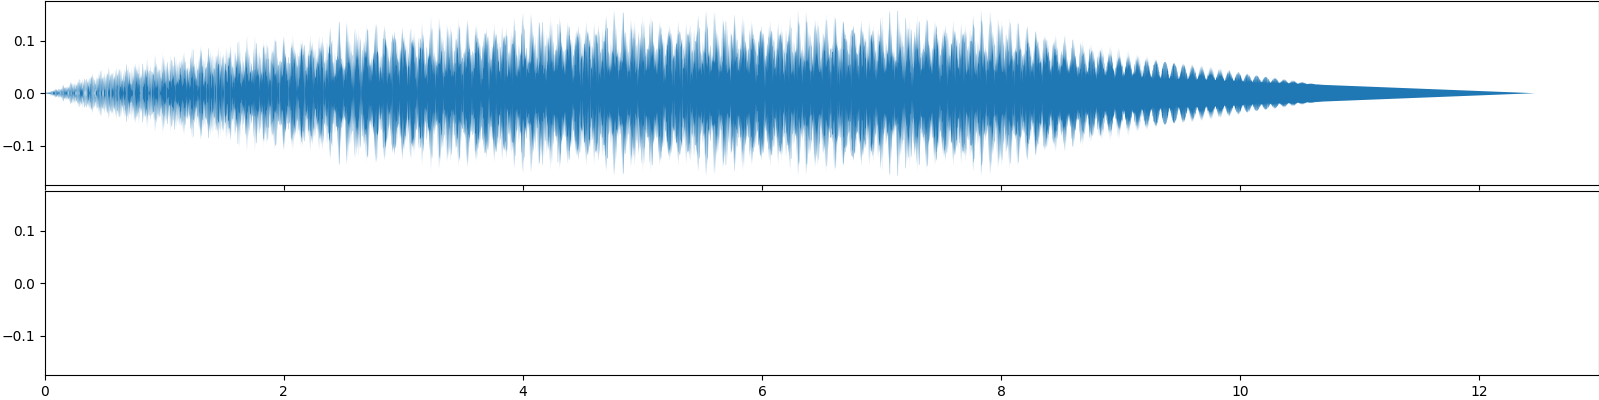

In [11]:
f0 = 130
for freq in freebarFrequencies(f0):
    event = engine.sched('vco', engine.now, 8, 
                         ifreq=freq, iamp=0.1, kcutoff=freq*1.2, ifade=freq/f0* 0.5, ifilterq=0.5)
engine.perform(engine.now + 2)
transp = random.uniform(0.92, 1.08)
engine.automatep(event, 6, (0, 1, 5, transp))
engine.perform(extratime=5)
engine.stop()